<a href="https://colab.research.google.com/github/lkamimura/SDC/blob/main/EjemploColabOctave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de texto, imagen y codigo latex
---

Dado el esquema simplificado y en un punto de operación de un avión:

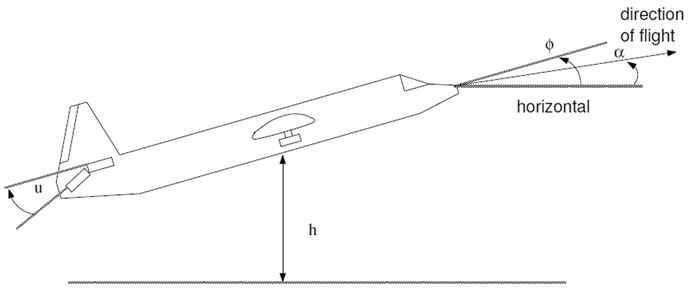

Las ecuaciones son
<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
\ \dot{\alpha}(t)=a(\phi(t) -\alpha(t))  \\
\ \ddot{\phi}(t) = -\omega ^2 (\phi (t)-\alpha (t) -b \cdot u(t)) \\
\ \dot{h}(t)=c \cdot \alpha (t)
\end{cases}
\end{equation*} \tag*{}$

donde $\omega >0$ al igual que $a$ y $b$.

# Instalación de Octave en el entorno Colab

---


Se instala el programa Octave, y las librerías necesarias.

In [1]:
# !apt-get update #Usar para actualizar librerias, únicamente
from IPython import display
!apt install octave               #Instala colab en el entorno de trabajo
!apt install octave python3-sympy #Instala el paquete simbólico de Octave, que incluye el Sympy de Python
!apt install liboctave-dev
!apt-get install octave-control   #en esta version conviene instalar directo de debian el paquete control
display.clear_output()            #Borra la terminal para que no moleste a la visualizacion final

In [4]:
#Crea un archivo de octave para instalar el paquete symbolic y el control
%%writefile Inst_SC.m
pkg install -forge symbolic
#pkg install -forge control #es muy lento por eso lo instalamos directamente desde debian en el codigo anterior

Writing Inst_SC.m


In [5]:
!octave -W Inst_SC.m #corre el código "Inst_SC.m" adentro de Octave
display.clear_output()

In [6]:
!pip install --user sympy==1.5.1 #Normalmente no es necesario, pero ésta versión actual de "octave-symbolic" lo exige
display.clear_output()

Se debe agregar en el .m el path donde está el Python, mediante una línea como ésta:

---


**setenv PYTHON /usr/local/bin/python**


---


para acceder al sympy desde symbolic. No obtante, puede ser diferente el path y debe verificarse en caso de que no funcione.


# Codigo Octave
---

In [8]:
%%writefile Ejemplo.m
clear all; clc;
warning('off','all'); #suprime los "warnings" en la terminal para mejorar la visualizacion
setenv PYTHON /usr/local/bin/python %Acá está el vinculo con Pyton, para acceder al sympy desde symbolic
%/usr/bin/python
pkg load control

hfig1 = figure(1);
set(hfig1, 'Visible', 'off'); #Hace que no se vea la imagen que creamos porque se veria mal en la terminal
G=tf([1],[1 1 1])
step(G)
print -dpng Ejemplo.png #guarda lo graficado en un archivo "Ejemplo.png"

Writing Ejemplo.m



Transfer function 'G' from input 'u1' to output ...

           1     
 y1:  -----------
      s^2 + s + 1

Continuous-time model.
ans = -7.7682


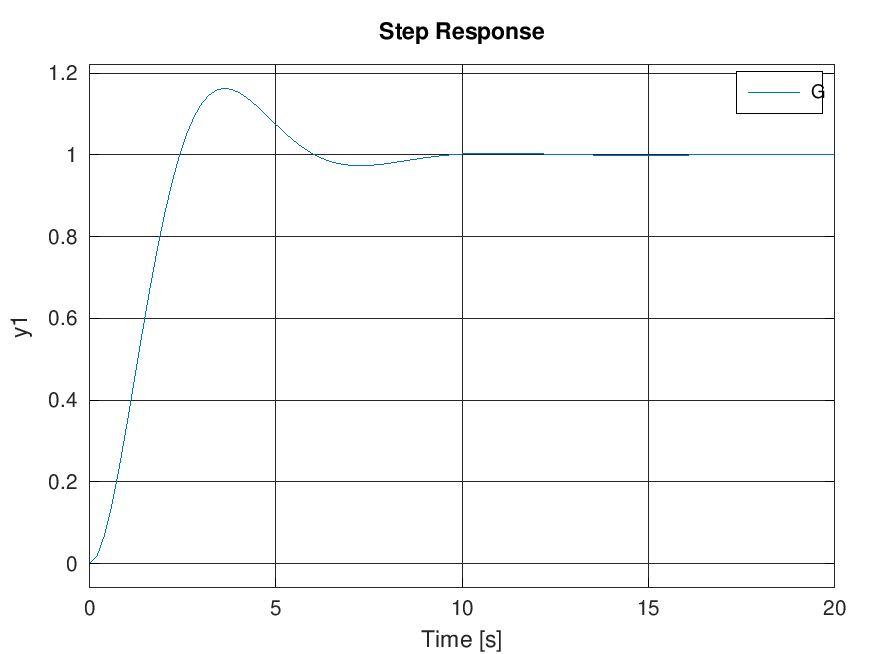

In [9]:
#Corre el codigo "Ejemplo.m" en octave y luego muestra la imagen "Ejemplo.m"
!octave -W Ejemplo.m # -W : no window system
display.Image('Ejemplo.png')

# Codigo Python
---
https://python-control.readthedocs.io/en/0.10.0/intro.html


In [12]:
!pip install control #instala el paquete control de python
display.clear_output()

<TransferFunction>: sys[16]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


     1
-----------
s^2 + s + 1



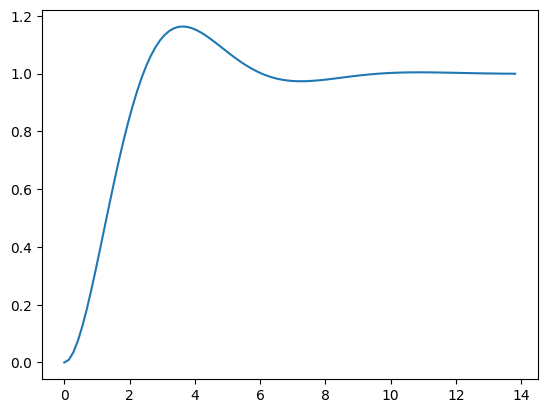

In [22]:
import os
import matplotlib.pyplot as plt  # MATLAB-like plotting functions
from control.matlab import *  # MATLAB-like functions
import control as ct
import numpy as np


# Transfer functions for dynamics
G = ct.tf([1], [1, 1, 1])
print(G)
yout, T = step(G)
plt.plot(T.T, yout.T)